In [4]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [6]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

Q/Q13.jpg
Q/Q14.jpg
Q/Q15.jpg
Q/Q16.jpg
Q/Q17.jpg
Q/Q18.jpg
Q/Q19.jpg
Q/Q2.jpg
Q/Q20.jpg
Q/Q21.jpg
Q/Q22.jpg
Q/Q23.jpg
Q/Q24.jpg
Q/Q25.jpg
Q/Q26.jpg
Q/Q27.jpg
Q/Q28.jpg
Q/Q29.jpg
Q/Q3.jpg
Q/Q30.jpg
Q/Q31.jpg
Q/Q32.jpg
Q/Q33.jpg
Q/Q34.jpg
Q/Q35.jpg
Q/Q36.jpg
Q/Q37.jpg
Q/Q38.jpg
Q/Q39.jpg
Q/Q4.jpg
Q/Q40.jpg
Q/Q41.jpg
Q/Q42.jpg
Q/Q43.jpg
Q/Q44.jpg
Q/Q45.jpg
Q/Q46.jpg
Q/Q47.jpg
Q/Q48.jpg
Q/Q49.jpg
Q/Q5.jpg
Q/Q50.jpg
Q/Q51.jpg
Q/Q52.jpg
Q/Q53.jpg
Q/Q54.jpg
Q/Q55.jpg
Q/Q6.jpg
Q/Q7.jpg
Q/Q8.jpg
Q/Q9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\R
R/R1.jpg
R/R10.jpg
R/R11.jpg
R/R12.jpg
R/R13.jpg
R/R14.jpg
R/R15.jpg
R/R16.jpg
R/R17.jpg
R/R18.jpg
R/R19.jpg
R/R2.jpg
R/R20.jpg
R/R21.jpg
R/R22.jpg
R/R23.jpg
R/R24.jpg
R/R25.jpg
R/R26.jpg
R/R27.jpg
R/R28.jpg
R/R29.jpg
R/R3.jpg
R/R30.jpg
R/R31.jpg
R/R32.jpg
R/R33.jpg
R/R34.jpg
R/R35.jpg
R/R36.jpg
R/R37.jpg
R/R38.jpg
R/R39.jpg
R/R4.jpg
R/R40.jpg
R/R41.jpg
R/R42.jpg
R/R43.jpg
R/R44.jpg
R/R45.jpg
R/R46.jpg
R/R47.jpg
R/R48.jpg


In [7]:
print(len(filename))

1430


In [8]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [9]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [10]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

       filename label
98    B/B49.jpg     B
1399  Z/Z31.jpg     Z
576   K/K33.jpg     K
7     A/A16.jpg     A
570   K/K28.jpg     K
...         ...   ...
1368  Y/Y53.jpg     Y
893   Q/Q21.jpg     Q
534   J/J45.jpg     J
175   D/D19.jpg     D
866   P/P47.jpg     P

[1430 rows x 2 columns]


In [11]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [12]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [14]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [15]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_32_150/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(32, 32), batch_size=10, color_mode= "grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(32, 32), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[32, 32, 1]))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                 monitor = 'val_accuracy', verbose = 1, 
                                 save_best_only = True, mode='max')
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 150, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_32_150/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results['accuracy'])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 64)       0         
 )                                                               
                                                                 

115/115 [==============================] - 135s 1s/step - loss: 3.3518 - accuracy: 0.0656 - val_loss: 4.2425 - val_accuracy: 0.0490
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.3188 - accuracy: 0.0621
Epoch 7: val_accuracy improved from 0.04895 to 0.07343, saving model to /saved_models_32_150\model_1.h5
115/115 [==============================] - 134s 1s/step - loss: 3.3188 - accuracy: 0.0621 - val_loss: 3.2702 - val_accuracy: 0.0734
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.3193 - accuracy: 0.0559
Epoch 8: val_accuracy did not improve from 0.07343
115/115 [==============================] - 132s 1s/step - loss: 3.3193 - accuracy: 0.0559 - val_loss: 4.0491 - val_accuracy: 0.0280
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.2166 - accuracy: 0.0813
Epoch 9: val_accuracy did not improve from 0.07343
115/115 [==============================] - 133s 1s/step - loss: 3.2166 - accuracy: 0.0813 - val_loss: 4.890

115/115 [==============================] - ETA: 0s - loss: 3.0066 - accuracy: 0.0752
Epoch 35: val_accuracy did not improve from 0.08741
115/115 [==============================] - 133s 1s/step - loss: 3.0066 - accuracy: 0.0752 - val_loss: 4.7751 - val_accuracy: 0.0350
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 3.0306 - accuracy: 0.0795
Epoch 36: val_accuracy did not improve from 0.08741
115/115 [==============================] - 133s 1s/step - loss: 3.0306 - accuracy: 0.0795 - val_loss: 3.5480 - val_accuracy: 0.0420
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9918 - accuracy: 0.0839
Epoch 37: val_accuracy did not improve from 0.08741
115/115 [==============================] - 133s 1s/step - loss: 2.9918 - accuracy: 0.0839 - val_loss: 4.7902 - val_accuracy: 0.0280
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9867 - accuracy: 0.0848
Epoch 38: val_accuracy did not improve from 0.08741
115/115 [========

Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.8978 - accuracy: 0.1128
Epoch 64: val_accuracy did not improve from 0.10490
115/115 [==============================] - 133s 1s/step - loss: 2.8978 - accuracy: 0.1128 - val_loss: 4.3007 - val_accuracy: 0.0455
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8837 - accuracy: 0.0953
Epoch 65: val_accuracy did not improve from 0.10490
115/115 [==============================] - 132s 1s/step - loss: 2.8837 - accuracy: 0.0953 - val_loss: 3.4772 - val_accuracy: 0.0734
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8660 - accuracy: 0.0997
Epoch 66: val_accuracy did not improve from 0.10490
115/115 [==============================] - 133s 1s/step - loss: 2.8660 - accuracy: 0.0997 - val_loss: 6.4129 - val_accuracy: 0.0280
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.8591 - accuracy: 0.1180
Epoch 67: val_accuracy did not improve from 0.10490
115/

Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.6982 - accuracy: 0.1600
Epoch 93: val_accuracy did not improve from 0.14685
115/115 [==============================] - 133s 1s/step - loss: 2.6982 - accuracy: 0.1600 - val_loss: 2.8266 - val_accuracy: 0.1049
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.7571 - accuracy: 0.1582
Epoch 94: val_accuracy did not improve from 0.14685
115/115 [==============================] - 133s 1s/step - loss: 2.7571 - accuracy: 0.1582 - val_loss: 3.7305 - val_accuracy: 0.0664
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.7123 - accuracy: 0.1425
Epoch 95: val_accuracy did not improve from 0.14685
115/115 [==============================] - 133s 1s/step - loss: 2.7123 - accuracy: 0.1425 - val_loss: 3.1868 - val_accuracy: 0.0839
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.7654 - accuracy: 0.1425
Epoch 96: val_accuracy did not improve from 0.14685
115/

115/115 [==============================] - 133s 1s/step - loss: 2.6337 - accuracy: 0.1495 - val_loss: 2.7170 - val_accuracy: 0.1294
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.6059 - accuracy: 0.1748
Epoch 122: val_accuracy did not improve from 0.16783
115/115 [==============================] - 132s 1s/step - loss: 2.6059 - accuracy: 0.1748 - val_loss: 2.8801 - val_accuracy: 0.1119
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5728 - accuracy: 0.1617
Epoch 123: val_accuracy did not improve from 0.16783
115/115 [==============================] - 133s 1s/step - loss: 2.5728 - accuracy: 0.1617 - val_loss: 3.8707 - val_accuracy: 0.0839
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.6067 - accuracy: 0.1766
Epoch 124: val_accuracy did not improve from 0.16783
115/115 [==============================] - 133s 1s/step - loss: 2.6067 - accuracy: 0.1766 - val_loss: 2.8775 - val_accuracy: 0.1189
Epoch 125/150
11

115/115 [==============================] - ETA: 0s - loss: 2.5280 - accuracy: 0.1862
Epoch 150: val_accuracy did not improve from 0.19930
29/29 [==============================] - 7s 231ms/step


Cross Validation:  1
Accuracy:  0.19930070638656616
Precision:  0.4108713256440529
Recall:  0.1993006993006993
f1 score:  0.2504486736328346


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

115/115 [==============================] - ETA: 0s - loss: 3.3748 - accuracy: 0.0577
Epoch 7: val_accuracy did not improve from 0.05944
115/115 [==============================] - 133s 1s/step - loss: 3.3748 - accuracy: 0.0577 - val_loss: 7.2668 - val_accuracy: 0.0559
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.3655 - accuracy: 0.0603
Epoch 8: val_accuracy did not improve from 0.05944
115/115 [==============================] - 133s 1s/step - loss: 3.3655 - accuracy: 0.0603 - val_loss: 4.8905 - val_accuracy: 0.0385
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.2894 - accuracy: 0.0629
Epoch 9: val_accuracy did not improve from 0.05944
115/115 [==============================] - 133s 1s/step - loss: 3.2894 - accuracy: 0.0629 - val_loss: 3.8536 - val_accuracy: 0.0385
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.2969 - accuracy: 0.0551
Epoch 10: val_accuracy did not improve from 0.05944
115/115 [=============

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 3.0784 - accuracy: 0.0612
Epoch 36: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 3.0784 - accuracy: 0.0612 - val_loss: 7.2901 - val_accuracy: 0.0594
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 3.0744 - accuracy: 0.0760
Epoch 37: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 3.0744 - accuracy: 0.0760 - val_loss: 4.3101 - val_accuracy: 0.0594
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 3.0779 - accuracy: 0.0726
Epoch 38: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 3.0779 - accuracy: 0.0726 - val_loss: 65.0445 - val_accuracy: 0.0594
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 3.0764 - accuracy: 0.0708
Epoch 39: val_accuracy did not improve from 0.06993
115

Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.9769 - accuracy: 0.0822
Epoch 65: val_accuracy did not improve from 0.08392
115/115 [==============================] - 132s 1s/step - loss: 2.9769 - accuracy: 0.0822 - val_loss: 36.8643 - val_accuracy: 0.0420
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.9690 - accuracy: 0.0970
Epoch 66: val_accuracy did not improve from 0.08392
115/115 [==============================] - 132s 1s/step - loss: 2.9690 - accuracy: 0.0970 - val_loss: 16.7009 - val_accuracy: 0.0350
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.9458 - accuracy: 0.0892
Epoch 67: val_accuracy did not improve from 0.08392
115/115 [==============================] - 133s 1s/step - loss: 2.9458 - accuracy: 0.0892 - val_loss: 16.8936 - val_accuracy: 0.0524
Epoch 68/150
115/115 [==============================] - ETA: 0s - loss: 2.9413 - accuracy: 0.0944
Epoch 68: val_accuracy did not improve from 0.08392
1

Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.7439 - accuracy: 0.1617
Epoch 94: val_accuracy did not improve from 0.10490
115/115 [==============================] - 133s 1s/step - loss: 2.7439 - accuracy: 0.1617 - val_loss: 8.8943 - val_accuracy: 0.0420
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.8322 - accuracy: 0.1267
Epoch 95: val_accuracy did not improve from 0.10490
115/115 [==============================] - 132s 1s/step - loss: 2.8322 - accuracy: 0.1267 - val_loss: 9.5496 - val_accuracy: 0.0734
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.7875 - accuracy: 0.1460
Epoch 96: val_accuracy did not improve from 0.10490
115/115 [==============================] - 133s 1s/step - loss: 2.7875 - accuracy: 0.1460 - val_loss: 3.9943 - val_accuracy: 0.0629
Epoch 97/150
115/115 [==============================] - ETA: 0s - loss: 2.7982 - accuracy: 0.1285
Epoch 97: val_accuracy did not improve from 0.10490
115/

Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.6396 - accuracy: 0.1678
Epoch 123: val_accuracy improved from 0.14685 to 0.19231, saving model to /saved_models_32_150\model_2.h5
115/115 [==============================] - 134s 1s/step - loss: 2.6396 - accuracy: 0.1678 - val_loss: 2.7363 - val_accuracy: 0.1923
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.6401 - accuracy: 0.1757
Epoch 124: val_accuracy did not improve from 0.19231
115/115 [==============================] - 132s 1s/step - loss: 2.6401 - accuracy: 0.1757 - val_loss: 5.6803 - val_accuracy: 0.0524
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.6297 - accuracy: 0.1678
Epoch 125: val_accuracy did not improve from 0.19231
115/115 [==============================] - 132s 1s/step - loss: 2.6297 - accuracy: 0.1678 - val_loss: 3.2481 - val_accuracy: 0.1014
Epoch 126/150
115/115 [==============================] - ETA: 0s - loss: 2.6212 - accuracy: 0.1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.3862 - accuracy: 0.0603
Epoch 7: val_accuracy did not improve from 0.05944
115/115 [==============================] - 132s 1s/step - loss: 3.3862 - accuracy: 0.0603 - val_loss: 6.1578 - val_accuracy: 0.0490
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.3360 - accuracy: 0.0603
Epoch 8: val_accuracy did not improve from 0.05944
115/115 [==============================] - 132s 1s/step - loss: 3.3360 - accuracy: 0.0603 - val_loss: 3.7360 - val_accuracy: 0.0350
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.3155 - accuracy: 0.0621
Epoch 9: val_accuracy did not improve from 0.05944
115/115 [==============================] - 132s 1s/step - loss: 3.3155 - accuracy: 0.0621 - val_loss: 6.9028 - val_accuracy: 0.0385
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.2545 - accuracy: 0.0647
Epoch 10: val_accuracy did not improve from 0.05944
115/115 [=

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9263 - accuracy: 0.1014
Epoch 36: val_accuracy did not improve from 0.06294
115/115 [==============================] - 132s 1s/step - loss: 2.9263 - accuracy: 0.1014 - val_loss: 14.1357 - val_accuracy: 0.0385
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9436 - accuracy: 0.1180
Epoch 37: val_accuracy did not improve from 0.06294
115/115 [==============================] - 132s 1s/step - loss: 2.9436 - accuracy: 0.1180 - val_loss: 4.6409 - val_accuracy: 0.0559
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9950 - accuracy: 0.0918
Epoch 38: val_accuracy did not improve from 0.06294
115/115 [==============================] - 132s 1s/step - loss: 2.9950 - accuracy: 0.0918 - val_loss: 9.4789 - val_accuracy: 0.0385
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.9647 - accuracy: 0.1093
Epoch 39: val_accuracy did not improve from 0.06294
115

Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8530 - accuracy: 0.1136
Epoch 65: val_accuracy did not improve from 0.11189
115/115 [==============================] - 132s 1s/step - loss: 2.8530 - accuracy: 0.1136 - val_loss: 5.2998 - val_accuracy: 0.0524
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8705 - accuracy: 0.1136
Epoch 66: val_accuracy did not improve from 0.11189
115/115 [==============================] - 133s 1s/step - loss: 2.8705 - accuracy: 0.1136 - val_loss: 12.4557 - val_accuracy: 0.0524
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.8909 - accuracy: 0.1189
Epoch 67: val_accuracy did not improve from 0.11189
115/115 [==============================] - 132s 1s/step - loss: 2.8909 - accuracy: 0.1189 - val_loss: 4.9499 - val_accuracy: 0.0594
Epoch 68/150
115/115 [==============================] - ETA: 0s - loss: 2.8740 - accuracy: 0.1302
Epoch 68: val_accuracy did not improve from 0.11189
115

Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.8624 - accuracy: 0.1154
Epoch 94: val_accuracy did not improve from 0.13287
115/115 [==============================] - 132s 1s/step - loss: 2.8624 - accuracy: 0.1154 - val_loss: 8.8197 - val_accuracy: 0.0490
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.8201 - accuracy: 0.1119
Epoch 95: val_accuracy did not improve from 0.13287
115/115 [==============================] - 132s 1s/step - loss: 2.8201 - accuracy: 0.1119 - val_loss: 5.8691 - val_accuracy: 0.0280
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.8288 - accuracy: 0.1267
Epoch 96: val_accuracy did not improve from 0.13287
115/115 [==============================] - 133s 1s/step - loss: 2.8288 - accuracy: 0.1267 - val_loss: 3.6318 - val_accuracy: 0.0629
Epoch 97/150
115/115 [==============================] - ETA: 0s - loss: 2.8141 - accuracy: 0.1302
Epoch 97: val_accuracy did not improve from 0.13287
115/

Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.7999 - accuracy: 0.1128
Epoch 123: val_accuracy improved from 0.14336 to 0.17483, saving model to /saved_models_32_150\model_3.h5
115/115 [==============================] - 134s 1s/step - loss: 2.7999 - accuracy: 0.1128 - val_loss: 2.7416 - val_accuracy: 0.1748
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.8098 - accuracy: 0.1224
Epoch 124: val_accuracy did not improve from 0.17483
115/115 [==============================] - 131s 1s/step - loss: 2.8098 - accuracy: 0.1224 - val_loss: 2.8565 - val_accuracy: 0.1014
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.8007 - accuracy: 0.1189
Epoch 125: val_accuracy did not improve from 0.17483
115/115 [==============================] - 132s 1s/step - loss: 2.8007 - accuracy: 0.1189 - val_loss: 3.9329 - val_accuracy: 0.0629
Epoch 126/150
115/115 [==============================] - ETA: 0s - loss: 2.8051 - accuracy: 0.1

Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.3849 - accuracy: 0.0481
Epoch 7: val_accuracy did not improve from 0.05594
115/115 [==============================] - 133s 1s/step - loss: 3.3849 - accuracy: 0.0481 - val_loss: 5.2713 - val_accuracy: 0.0280
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.3317 - accuracy: 0.0586
Epoch 8: val_accuracy did not improve from 0.05594
115/115 [==============================] - 134s 1s/step - loss: 3.3317 - accuracy: 0.0586 - val_loss: 127.6867 - val_accuracy: 0.0350
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.3145 - accuracy: 0.0621
Epoch 9: val_accuracy did not improve from 0.05594
115/115 [==============================] - 134s 1s/step - loss: 3.3145 - accuracy: 0.0621 - val_loss: 4.6193 - val_accuracy: 0.0245
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.2822 - accuracy: 0.0612
Epoch 10: val_accuracy did not improve from 0.05594
115/115 

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9475 - accuracy: 0.0979
Epoch 36: val_accuracy did not improve from 0.06294
115/115 [==============================] - 134s 1s/step - loss: 2.9475 - accuracy: 0.0979 - val_loss: 6.1178 - val_accuracy: 0.0140
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9492 - accuracy: 0.1171
Epoch 37: val_accuracy did not improve from 0.06294
115/115 [==============================] - 134s 1s/step - loss: 2.9492 - accuracy: 0.1171 - val_loss: 3.2367 - val_accuracy: 0.0455
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9077 - accuracy: 0.1267
Epoch 38: val_accuracy did not improve from 0.06294
115/115 [==============================] - 134s 1s/step - loss: 2.9077 - accuracy: 0.1267 - val_loss: 4.5163 - val_accuracy: 0.0455
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.9002 - accuracy: 0.1154
Epoch 39: val_accuracy improved from 0.06294 to 0.10490,

Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.7087 - accuracy: 0.1617
Epoch 65: val_accuracy did not improve from 0.10490
115/115 [==============================] - 146s 1s/step - loss: 2.7087 - accuracy: 0.1617 - val_loss: 3.9527 - val_accuracy: 0.0245
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.7151 - accuracy: 0.1626
Epoch 66: val_accuracy did not improve from 0.10490
115/115 [==============================] - 134s 1s/step - loss: 2.7151 - accuracy: 0.1626 - val_loss: 4.2851 - val_accuracy: 0.0664
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.7213 - accuracy: 0.1521
Epoch 67: val_accuracy did not improve from 0.10490
115/115 [==============================] - 135s 1s/step - loss: 2.7213 - accuracy: 0.1521 - val_loss: 18.4488 - val_accuracy: 0.0385
Epoch 68/150
115/115 [==============================] - ETA: 0s - loss: 2.7039 - accuracy: 0.1696
Epoch 68: val_accuracy did not improve from 0.10490
115

Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.5920 - accuracy: 0.1923
Epoch 94: val_accuracy improved from 0.11189 to 0.13636, saving model to /saved_models_32_150\model_4.h5
115/115 [==============================] - 134s 1s/step - loss: 2.5920 - accuracy: 0.1923 - val_loss: 2.8228 - val_accuracy: 0.1364
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.6353 - accuracy: 0.1871
Epoch 95: val_accuracy did not improve from 0.13636
115/115 [==============================] - 132s 1s/step - loss: 2.6353 - accuracy: 0.1871 - val_loss: 3.6516 - val_accuracy: 0.0524
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.5829 - accuracy: 0.1976
Epoch 96: val_accuracy did not improve from 0.13636
115/115 [==============================] - 133s 1s/step - loss: 2.5829 - accuracy: 0.1976 - val_loss: 3.2736 - val_accuracy: 0.0769
Epoch 97/150
115/115 [==============================] - ETA: 0s - loss: 2.5977 - accuracy: 0.1888
Epo

115/115 [==============================] - ETA: 0s - loss: 2.5339 - accuracy: 0.2054
Epoch 122: val_accuracy improved from 0.17483 to 0.18182, saving model to /saved_models_32_150\model_4.h5
115/115 [==============================] - 135s 1s/step - loss: 2.5339 - accuracy: 0.2054 - val_loss: 2.4704 - val_accuracy: 0.1818
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5337 - accuracy: 0.2080
Epoch 123: val_accuracy did not improve from 0.18182
115/115 [==============================] - 132s 1s/step - loss: 2.5337 - accuracy: 0.2080 - val_loss: 3.6280 - val_accuracy: 0.0734
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.5203 - accuracy: 0.2150
Epoch 124: val_accuracy did not improve from 0.18182
115/115 [==============================] - 133s 1s/step - loss: 2.5203 - accuracy: 0.2150 - val_loss: 3.1163 - val_accuracy: 0.1049
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.5172 - accuracy: 0.2019
Epoch 125:

29/29 [==============================] - 7s 237ms/step


Cross Validation:  4
Accuracy:  0.19230769574642181
Precision:  0.33486604207758053
Recall:  0.19230769230769232
f1 score:  0.2238958687340223


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_64 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_65 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.4096 - accuracy: 0.0533
Epoch 7: val_accuracy improved from 0.05245 to 0.05944, saving model to /saved_models_32_150\model_5.h5
115/115 [==============================] - 135s 1s/step - loss: 3.4096 - accuracy: 0.0533 - val_loss: 3.2688 - val_accuracy: 0.0594
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.2918 - accuracy: 0.0708
Epoch 8: val_accuracy did not improve from 0.05944
115/115 [==============================] - 133s 1s/step - loss: 3.2918 - accuracy: 0.0708 - val_loss: 3.3358 - val_accuracy: 0.0559
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.3120 - accuracy: 0.0621
Epoch 9: val_accuracy did not improve from 0.05944
115/115 [==============================] - 134s 1s/step - loss: 3.3120 - accuracy: 0.0621 - val_loss: 28.3663 - val_accuracy: 0.0385
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.2536 - accuracy: 0.0682
Epoch 10

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 3.0341 - accuracy: 0.0691
Epoch 36: val_accuracy did not improve from 0.06294
115/115 [==============================] - 133s 1s/step - loss: 3.0341 - accuracy: 0.0691 - val_loss: 13.5127 - val_accuracy: 0.0455
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 3.0220 - accuracy: 0.0734
Epoch 37: val_accuracy did not improve from 0.06294
115/115 [==============================] - 133s 1s/step - loss: 3.0220 - accuracy: 0.0734 - val_loss: 4.6804 - val_accuracy: 0.0524
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 3.0212 - accuracy: 0.0892
Epoch 38: val_accuracy did not improve from 0.06294
115/115 [==============================] - 133s 1s/step - loss: 3.0212 - accuracy: 0.0892 - val_loss: 2664.6770 - val_accuracy: 0.0175
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.9926 - accuracy: 0.0883
Epoch 39: val_accuracy did not improve from 0.06294


Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8433 - accuracy: 0.1294
Epoch 65: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.8433 - accuracy: 0.1294 - val_loss: 3.3634 - val_accuracy: 0.1259
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.7916 - accuracy: 0.1372
Epoch 66: val_accuracy did not improve from 0.18531
115/115 [==============================] - 133s 1s/step - loss: 2.7916 - accuracy: 0.1372 - val_loss: 3.4319 - val_accuracy: 0.0874
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.7804 - accuracy: 0.1267
Epoch 67: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.7804 - accuracy: 0.1267 - val_loss: 15.9012 - val_accuracy: 0.0629
Epoch 68/150
115/115 [==============================] - ETA: 0s - loss: 2.8312 - accuracy: 0.1285
Epoch 68: val_accuracy did not improve from 0.18531
115

115/115 [==============================] - ETA: 0s - loss: 2.6677 - accuracy: 0.1792
Epoch 94: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.6677 - accuracy: 0.1792 - val_loss: 7.5890 - val_accuracy: 0.0315
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.6352 - accuracy: 0.1731
Epoch 95: val_accuracy did not improve from 0.18531
115/115 [==============================] - 133s 1s/step - loss: 2.6352 - accuracy: 0.1731 - val_loss: 9.3281 - val_accuracy: 0.0490
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.6239 - accuracy: 0.1731
Epoch 96: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.6239 - accuracy: 0.1731 - val_loss: 2.8434 - val_accuracy: 0.1189
Epoch 97/150
115/115 [==============================] - ETA: 0s - loss: 2.6520 - accuracy: 0.1713
Epoch 97: val_accuracy did not improve from 0.18531
115/115 [========

Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5928 - accuracy: 0.1818
Epoch 123: val_accuracy did not improve from 0.20280
115/115 [==============================] - 133s 1s/step - loss: 2.5928 - accuracy: 0.1818 - val_loss: 2.5219 - val_accuracy: 0.2028
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.5514 - accuracy: 0.1705
Epoch 124: val_accuracy did not improve from 0.20280
115/115 [==============================] - 134s 1s/step - loss: 2.5514 - accuracy: 0.1705 - val_loss: 2888.1484 - val_accuracy: 0.1084
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.5476 - accuracy: 0.1871
Epoch 125: val_accuracy did not improve from 0.20280
115/115 [==============================] - 133s 1s/step - loss: 2.5476 - accuracy: 0.1871 - val_loss: 5.0349 - val_accuracy: 0.0664
Epoch 126/150
115/115 [==============================] - ETA: 0s - loss: 2.5474 - accuracy: 0.2002
Epoch 126: val_accuracy improved from 0.20280 

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


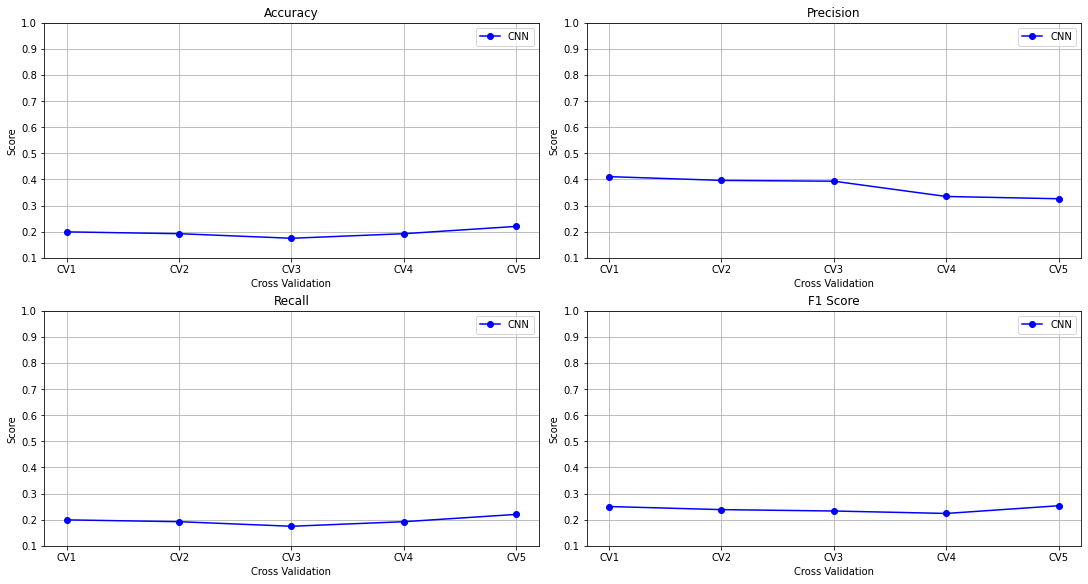

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

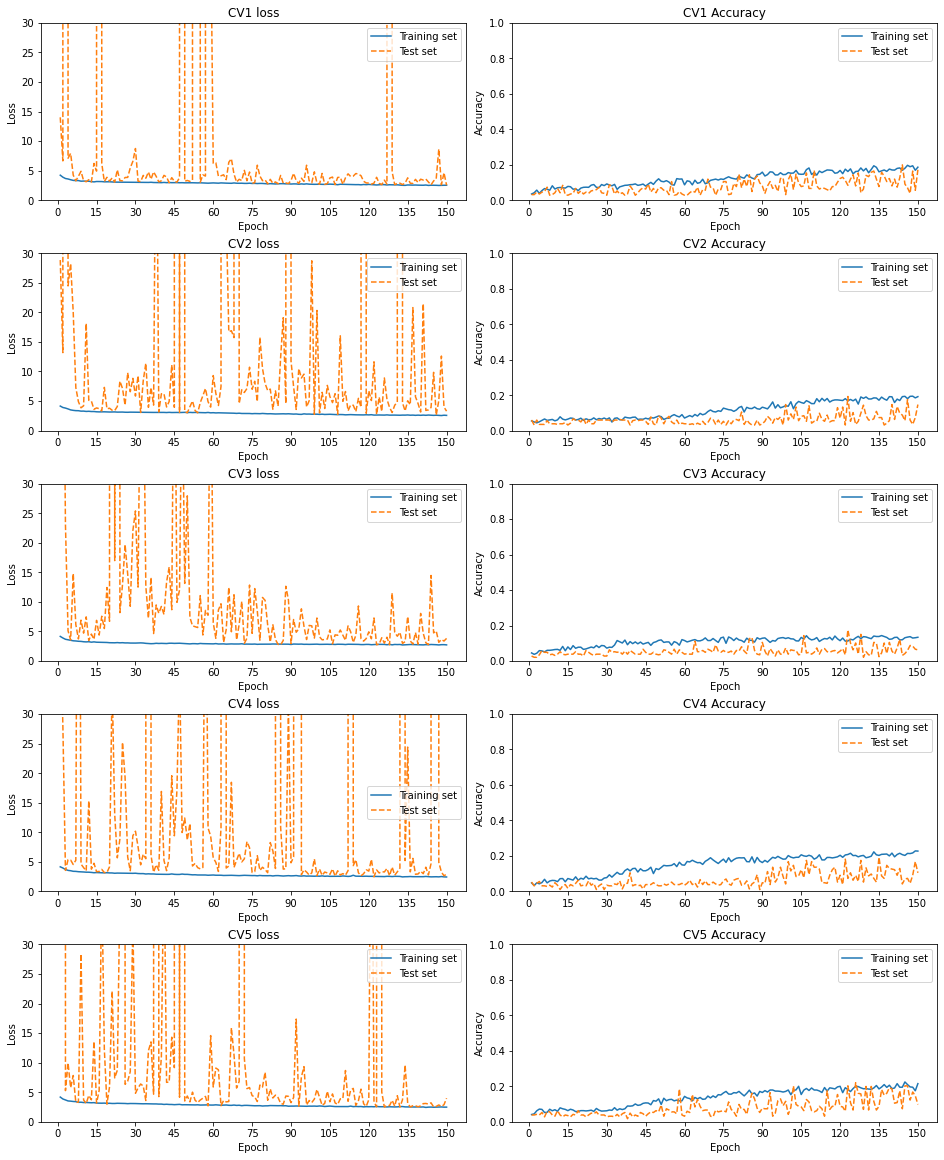

In [18]:
import matplotlib.pyplot as plt

n_epochs = 150
#set the x axis start from 1
x_axis = np.arange(1,151)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 30))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()

In [19]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filter, bias = layer.get_weights()
    print(layer.name, filter.shape)

conv2d_52 (3, 3, 1, 64)
conv2d_53 (3, 3, 64, 64)
conv2d_54 (3, 3, 64, 128)
conv2d_55 (3, 3, 128, 128)
conv2d_56 (3, 3, 128, 256)
conv2d_57 (3, 3, 256, 256)
conv2d_58 (3, 3, 256, 256)
conv2d_59 (3, 3, 256, 512)
conv2d_60 (3, 3, 512, 512)
conv2d_61 (3, 3, 512, 512)
conv2d_62 (3, 3, 512, 512)
conv2d_63 (3, 3, 512, 512)
conv2d_64 (3, 3, 512, 512)


In [20]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_52 (None, 30, 30, 64)
2 conv2d_53 (None, 28, 28, 64)
5 conv2d_54 (None, 25, 25, 128)
7 conv2d_55 (None, 23, 23, 128)
10 conv2d_56 (None, 20, 20, 256)
12 conv2d_57 (None, 18, 18, 256)
14 conv2d_58 (None, 16, 16, 256)
17 conv2d_59 (None, 13, 13, 512)
19 conv2d_60 (None, 11, 11, 512)
21 conv2d_61 (None, 9, 9, 512)
24 conv2d_62 (None, 6, 6, 512)
26 conv2d_63 (None, 4, 4, 512)
28 conv2d_64 (None, 2, 2, 512)


In [21]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

1/1 [==============================] - 0s 109ms/step


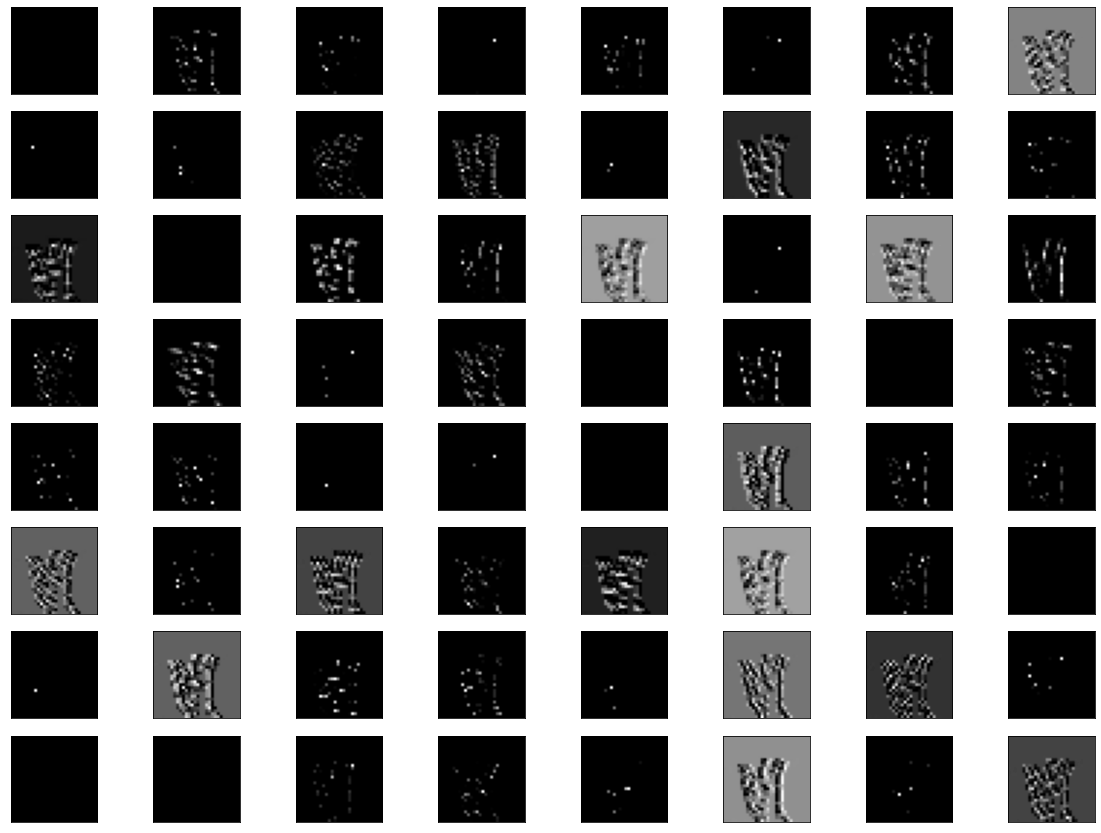

In [22]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

image = load_img("W10.jpg", target_size=(32,32), color_mode="grayscale")

image = img_to_array(image)
image = np.expand_dims(image, axis=0)

features = model.predict(image)
# image = preprocess_input(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

(1, 32, 32, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_64 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_65 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 25, 25, 128)       73856     
                                       

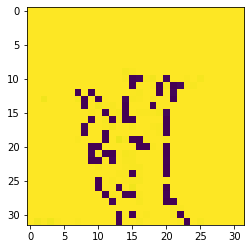

In [25]:
# img = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")

from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

#Prediction of single image
import numpy as np

img = load_img("W10.jpg", target_size=(32,32), color_mode="grayscale")
image = img_to_array(img)
images = image/255
test_image = np.expand_dims(images, axis = 0)
# image_data = preprocess_input(test_image)
print(test_image.shape)

model = load_model('model_5.h5')
model.summary()
result = model.predict(test_image)
plt.imshow(img)
#training_set.class_indices
# print('Predicted Sign is:')
# print('')
img = np.argmax(model.predict(test_image), axis=1)
print('Prediction:',img)
if img == 0:
    print('A')
elif img == 1:
    print('B')
elif img == 2:
    print('C')
elif img == 3:
    print('D')
elif img == 4:
    print('E')
elif img == 5:
    print('F')
elif img == 6:
    print('G')
elif img == 7:
    print('H')
elif img == 8:
    print('I')
elif img == 9:
    print('J')
elif img == 10:
    print('K')
elif img == 11:
    print('L')
elif img == 12:
    print('M')
elif img == 13:
    print('N')
elif img == 14:
    print('O')
elif img == 15:
    print('P')
elif img == 16:
    print('Q')
elif img == 17:
    print('R')
elif img == 18:
    print('S')
elif img == 19:
    print('T')
elif img == 20:
    print('U')
elif img == 21:
    print('V')
elif img == 22:
    print('W')
elif img == 23:
    print('X')
elif img == 24:
    print('Y')
elif img == 25:
    print('Z')

In [26]:
train_data_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}